In [26]:
import pandas as pd
import numpy as np
import seaborn as sb

### Задание №1

In [5]:
df = pd.read_stata('survey.dta') ## я записала датасет в переменную df и рассмотрела несколько строк из него
df.head()

,region,cod_ychr,s1,s2,s4,q1,q2,q3,q4_1,q4_2,...,o10_1,q3_1,q4_1_1,q4_2_1,obrazov,qqq5_1,qqq5,w,level,profgroup
0,Город Москва,Министерство труда и социальной защиты Рос,Москва,Министерство труда и социальной защиты,,мужской,34.0,12.0,5.0,4.0,...,99.0,4.0,2.0,2.0,6.0,NaN,1.0,1.842105,федеральный,труд и социальное развитие
1,Город Москва,Министерство сельского хозяйства Российск,Москва,Министерство сельского хозяйства,Департамент правового обеспечения,мужской,30.0,6.0,4.0,1.0,...,3.0,3.0,2.0,1.0,6.0,NaN,1.0,1.842105,федеральный,сельское хозяйство
2,Город Москва,Министерство связи и массовых коммуникаций,Москва,Министерство связи имассовых коммуникаций,Департамент организационного развития,женский,32.0,4.0,4.0,4.0,...,3.0,2.0,2.0,2.0,7.0,NaN,1.0,1.842105,федеральный,"связь, информационные технологии и массовы"
3,Город Москва,Министерство образования и науки Российско,Москва,Министерство образования и науки,Департамент информационной политики,женский,34.0,10.0,2.0,1.0,...,99.0,3.0,2.0,1.0,8.0,NaN,1.0,1.842105,федеральный,образование и наука
4,Город Москва,Министерство труда и социальной защиты Рос,Москва,Министерство труда и социальной защиты,Департамент госполитики в сфере гос и муниципа...,мужской,43.0,15.0,5.0,5.0,...,3.0,4.0,2.0,2.0,8.0,NaN,1.0,1.842105,федеральный,труд и социальное развитие


In [3]:
## 1.1. Сколько в файле survey.dta наблюдений и переменных?

print("Количество наблюдений:", len(df))
print("Количество переменных:", len(df.columns))


Количество наблюдений: 2479
Количество переменных: 249


In [6]:
## 1.2. Укажите имена трёх переменных из файла survey.dta, имеющих номинальную шкалу измерения значений. Объясните, почему у этих переменных номинальная шкала измерения.

# Определение переменных с номинальной шкалой измерения
s = []
for column in df.columns:
    if df[column].dtype == 'object':
        s.append(column)

print("Переменные с номинальной шкалой измерения:")
for i in s[:3]:
    print(i)


Переменные с номинальной шкалой измерения:
s1
s2
s4


Обяснение: 
Я проверила тип данных каждой переменной в файле. Если тип данных является строковым ('object')  (P.S. в библиотеке pandas тип данных строки представлен как 'object'), то это может указывать на наличие номинальной шкалы измерения. Затем я вывела имена первых трех переменных с номинальной шкалой измерения.

Почему они номинальные?

Они являются номинальными, тк переменные с номинальной шкалой измерения представляют собой категории или метки, которые не имеют упорядоченного или числового значения. Здесь значения представляют различные категории, и нет числового или упорядоченного значения, связанного с этими категориями.

In [20]:
## 1.3. Укажите имена трёх переменных из файла survey.dta, имеющих порядковую шкалу измерения значений. Объясните, почему у этих переменных порядковая шкала измерения.

# Определение переменных с порядковой шкалой измерения
k = []
for i in df.columns:
    j = df[i].unique()
    if len(j) > 2 and not pd.api.types.is_numeric_dtype(df[i]):
        k.append(i)

print("Переменные с порядковой шкалой измерения:")
for i in k[:3]:
    print(i)



Переменные с порядковой шкалой измерения:
region
cod_ychr
s1


In [16]:
# Давайте посмотрим на значения данных переменных и пойму почему у этих переменных порядковая шкала измерения
df.loc[:, ["region", "cod_ychr", "s1"]].sample(5) ## я вывела 5 строк на рандом

,region,cod_ychr,s1
1830,Московская область,Региональный Ространснадзор,"Московская область, г.Реутов"
666,Республика Адыгея,Региональный Минстрой,Майкоп
1775,Город Москва,Федеральная таможенная служба,Москва
307,Республика Адыгея,Региональный Минздрав,Майкоп
767,Ленинградская область,Региональный Минсельхоз,санкт-петербург


Переменные с порядковой шкалой измерения обычно представляют собой категориальные переменные, у которых значения имеют определенный порядок или ранжирование. В нашем случае, видно из датасета, что значения данных "region", "cod_ychr", "s1" с порядковой шкалой измерения. 

In [24]:
# 1.4. Укажите имена трёх переменных из файла survey.dta, имеющих интервальную или абсолютную шкалу измерения значений. Объясните, почему у этих переменных интервальная или абсолютная шкала измерения.

# Выбрала переменные с интервальной или абсолютной шкалой измерения
s = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')]

print("Переменные, имеющие интервальную или абсолютную шкалу измерения значений:",s.index.tolist()[:3])


Переменные, имеющие интервальную или абсолютную шкалу измерения значений: ['q2', 'q3', 'q4_1']


In [25]:
# Давайте посмотрим на значения данных переменных и пойму почему у этих переменных интервальная или абсолютная шкала измерения
df.loc[:, ['q2', 'q3', 'q4_1']].sample(5) ## я вывела 5 строк на рандом

,q2,q3,q4_1
795,33.0,8.0,2.0
1014,27.0,5.0,1.0
1144,37.0,10.0,10.0
2278,44.0,15.0,15.0
633,33.0,6.0,6.0


Видим, что значения переменных q2, q3, q4_1 тип данных является "int64" (целочисленный) или "float64" (число с плавающей запятой), что является признаком интервальной или абсолютной шкалы измерения. 

### Задание №2

In [28]:
df.head()

,region,cod_ychr,s1,s2,s4,q1,q2,q3,q4_1,q4_2,...,o10_1,q3_1,q4_1_1,q4_2_1,obrazov,qqq5_1,qqq5,w,level,profgroup
0,Город Москва,Министерство труда и социальной защиты Рос,Москва,Министерство труда и социальной защиты,,мужской,34.0,12.0,5.0,4.0,...,99.0,4.0,2.0,2.0,6.0,NaN,1.0,1.842105,федеральный,труд и социальное развитие
1,Город Москва,Министерство сельского хозяйства Российск,Москва,Министерство сельского хозяйства,Департамент правового обеспечения,мужской,30.0,6.0,4.0,1.0,...,3.0,3.0,2.0,1.0,6.0,NaN,1.0,1.842105,федеральный,сельское хозяйство
2,Город Москва,Министерство связи и массовых коммуникаций,Москва,Министерство связи имассовых коммуникаций,Департамент организационного развития,женский,32.0,4.0,4.0,4.0,...,3.0,2.0,2.0,2.0,7.0,NaN,1.0,1.842105,федеральный,"связь, информационные технологии и массовы"
3,Город Москва,Министерство образования и науки Российско,Москва,Министерство образования и науки,Департамент информационной политики,женский,34.0,10.0,2.0,1.0,...,99.0,3.0,2.0,1.0,8.0,NaN,1.0,1.842105,федеральный,образование и наука
4,Город Москва,Министерство труда и социальной защиты Рос,Москва,Министерство труда и социальной защиты,Департамент госполитики в сфере гос и муниципа...,мужской,43.0,15.0,5.0,5.0,...,3.0,4.0,2.0,2.0,8.0,NaN,1.0,1.842105,федеральный,труд и социальное развитие


In [29]:
# 2.1. Используя методы описательного анализа данных составьте «портрет» современного госслужащего. 
#      Проанализируйте пол, возраст, регион проживания, стаж работы, уровень образования и иные показатели, которые Вы посчитаете нужным рассмотреть.

# Анализ пола
print("Анализ пола:")
print(df['q1'].value_counts())

# Анализ возраста
print("\nАнализ возраста:")
print(df['q2'].describe())

# Анализ региона проживания
print("\nАнализ региона проживания:")
print(df['region'].value_counts())

# Анализ стажа работы
print("\nАнализ стажа работы:")
print(df['q3'].describe())

# Анализ уровня образования
print("\nАнализ уровня образования:")
print(df['obrazov'].value_counts())

Анализ пола:
q1
женский    1684
мужской     795
Name: count, dtype: int64

Анализ возраста:
count    2477.000000
mean       38.499394
std        10.473199
min        19.000000
25%        30.000000
50%        37.000000
75%        46.000000
max        97.000000
Name: q2, dtype: float64

Анализ региона проживания:
region
Город Москва             507
Тюменская область        141
Республика Татарстан      88
Город Санкт-Петербург     83
Краснодарский край        70
                        ... 
Ивановская область         5
Республика Тыва            5
Владимирская область       4
Мурманская область         3
Вологодская область        2
Name: count, Length: 77, dtype: int64

Анализ стажа работы:
count    2479.000000
mean       10.691811
std         8.833692
min         0.000000
25%         4.000000
50%         9.000000
75%        15.000000
max        99.000000
Name: q3, dtype: float64

Анализ уровня образования:
obrazov
6.0    1936
7.0     418
8.0      94
5.0      31
Name: count, dtype: int6

Я напишу только то, что я сделала, тк вся стаитистика итак понятна. Я анализировала различные переменные, такие как пол, возраст, регион проживания, стаж работы и уровень образования, с помощью методов описательной статистики, таких как value_counts() и describe()

In [32]:
# 2.2. Постройте частотную таблицу, сформированную на основе значений любой категориальной переменной. Под таблицей напишите интерпретацию полученных результатов частотного анализа данных.

# В качетстве категориальной переменной я выберу:
df.select_dtypes(include='object').columns


Index(['s1', 's2', 's4', 'q7_dr', 'q8_dr', 'q9_dr', 'q10_dr', 'm4_dr',
       'm12_dr', 'm171_dr', 'm172_dr', 'm23_dr', 'm24_dr', 'm25_dr', 'o4_dr',
       'k2_dr', 'p4_dr', 'p71_dr', 'e1_dr', 'e51', 'e52', 'e8_dr', 'e9_dr',
       'e12_dr', 'e14_dr', 't1_dr', 't4_dr', 't5_dr'],
      dtype='object')

In [33]:
# Подсчет частот категорий переменной "s2" (Полное наименование государственного органа респондента (заполняется интервьюером))
df["s2"].value_counts()

s2
ФТС                                                             49
Федеральная налоговая служба                                    32
Федеральная служба по надзору в сфере природопользования        28
Министерство здравоохранения                                    27
ДНПиП г. Москвы                                                 26
                                                                ..
Министерство ЖКХ и гражданской защиты населения                  1
Управление Социальной Защиты населения Липецкой обл              1
Департамент экономического рахвития Брянской области             1
Управление ЖКХ по Липецкой обл                                   1
Территориальный орган Росздравнадзора по Ярославской области     1
Name: count, Length: 984, dtype: int64

Исходя из данной таблицы, я получила частотную таблицу для переменной "s2", где каждая строка представляет собой категорию (полное наименование государственного органа респондента), а числа справа от категорий представляют собой частоты, то есть количество наблюдений, которые относятся к каждой категории.

Например, в таблице "ФТС" встречается 49 раз, "Федеральная налоговая служба" - 32 раза, "Федеральная служба по надзору в сфере природопользования" - 28 раз и так далее.

На основе предоставленной таблицы, вы можете сделать следующие наблюдения:

1) "ФТС" является наиболее часто встречающейся категорией среди государственных органов респондентов, поскольку она имеет наибольшую частоту (49).

2) "Федеральная налоговая служба" и "Федеральная служба по надзору в сфере природопользования" также встречаются довольно часто (32 и 28 соответственно).

3) Есть множество других категорий, которые встречаются с низкой частотой (1 раз). Такие как:  Министерство ЖКХ и гражданской защиты населения, Управление Социальной Защиты населения Липецкой обл и тд.


In [ ]:
# 2.3. Рассчитайте все показатели описательной статистки, которые имеет смысл использовать для характеристики значений переменной, для одной номинальной, одной порядковой и одной метрической переменной. Интерпретируйте полученные результаты.

# Найдем номинальные переменные, порядковые и метрические переменные:

In [44]:
# номинальные переменные:
df.dtypes[df.dtypes == 'object']

s1         object
s2         object
s4         object
q7_dr      object
q8_dr      object
q9_dr      object
q10_dr     object
m4_dr      object
m12_dr     object
m171_dr    object
m172_dr    object
m23_dr     object
m24_dr     object
m25_dr     object
o4_dr      object
k2_dr      object
p4_dr      object
p71_dr     object
e1_dr      object
e51        object
e52        object
e8_dr      object
e9_dr      object
e12_dr     object
e14_dr     object
t1_dr      object
t4_dr      object
t5_dr      object
dtype: object

In [51]:
# метрические переменные:
k1 = df.dtypes[df.dtypes == 'float64']
k2 = df.dtypes[df.dtypes == 'int64']
print(k1,k2)

q2         float64
q3         float64
q4_1       float64
q4_2       float64
q5         float64
qq5        float64
o2_1       float64
o2_2       float64
o2_3       float64
o2_4       float64
o2_5       float64
o3         float64
TOTAL      float64
e_51_1     float64
e_51_2     float64
e_51_3     float64
e_52_1     float64
group      float64
sfera      float64
proekt     float64
vozrast    float64
m10_1      float64
m11_1      float64
t7_1       float64
o9_1       float64
o10_1      float64
q3_1       float64
q4_1_1     float64
q4_2_1     float64
obrazov    float64
qqq5_1     float64
qqq5       float64
w          float64
dtype: object Series([], dtype: object)


In [53]:
# Рассчитываем описательную статистику для номинальной переменной
print("Описательная статистика для номинальной переменной:")
print(df['s1'].value_counts())

Описательная статистика для номинальной переменной:
s1
Москва                           511
санкт-петербург                  109
Казань                            81
Тюменская область                 76
Краснодар                         70
                                ... 
ставропольский край                1
Биробиджан                         1
г.Тольятти, Самарская область      1
Московская область, г.Реутов       1
чар                                1
Name: count, Length: 122, dtype: int64


Вывод:
на основе описательной статистики, следует обратить внимание на следующие аспекты:


1) Количество уникальных значений: В данном случае, переменная "s1" имеет 122 уникальных значения. Это означает, что опрашивались государственные служащие из различных населенных пунктов и субъектов Российской Федерации.

2) Частота каждого значения: Описательная статистика показывает количество опрашиваемых государственных служащих для каждого населенного пункта или субъекта Российской Федерации. Например, в Москве было опрошено 511 государственных служащих, в Санкт-Петербурге - 109, в Казани - 81 и так далее.

3) Распределение значений: Описательная статистика для номинальной переменной не предоставляет информацию о среднем значении или стандартном отклонении, так как эти меры применимы только к метрическим переменным. Однако, она позволяет оценить распределение значений и их относительную частоту.





In [54]:
# Рассчитываем описательную статистику для порядковой переменной
print("Описательная статистика для порядковой переменной:")
print(df['q2'].describe())

Описательная статистика для порядковой переменной:
count    2477.000000
mean       38.499394
std        10.473199
min        19.000000
25%        30.000000
50%        37.000000
75%        46.000000
max        97.000000
Name: q2, dtype: float64


Вывод: на основе данной описательной статистики, можно сделать следующие выводы:

* Количество наблюдений (count): 2477
* Среднее значение (mean): 38.499394
* Стандартное отклонение (std): 10.473199
* Минимальное значение (min): 19
* 25-й перцентиль (25%): 30
* Медиана (50%): 37
* 75-й перцентиль (75%): 46
* Максимальное значение (max): 97

Эти значения позволяют оценить распределение возраста респондентов. Например, средний возраст составляет около 38.5 лет, а медиана (значение, разделяющее выборку пополам) равна 37 годам. Стандартное отклонение указывает на разброс данных вокруг среднего значения, и в данном случае оно составляет примерно 10.5 лет.

Помимо этого, минимальное значение равно 19 годам, а максимальное значение - 97 лет. Перцентили (25%, 50%, 75%) показывают, как распределены значения в выборке по квартилям. Например, 25% респондентов имеют возраст до 30 лет, а 75% - до 46 лет.

Эти статистические данные помогают понять характеристики возрастного распределения и предоставляют информацию о возрасте респондентов в данной выборке.

In [56]:
# Рассчитываем описательную статистику для метрической переменной
print("Описательная статистика для метрической переменной:")
print(df['q3'].describe())

Описательная статистика для метрической переменной:
count    2479.000000
mean       10.691811
std         8.833692
min         0.000000
25%         4.000000
50%         9.000000
75%        15.000000
max        99.000000
Name: q3, dtype: float64


Вывод: на основе данной описательной статистики, можно сделать следующие выводы:

* Количество наблюдений (count): 2479
* Среднее значение (mean): 10.691811
* Стандартное отклонение (std): 8.833692
* Минимальное значение (min): 0
* 25-й перцентиль (25%): 4
* Медиана (50%): 9
* 75-й перцентиль (75%): 15
* Максимальное значение (max): 99

Эти значения позволяют оценить распределение общего стажа государственной службы респондентов. Например, средний стаж составляет около 10.7 лет, а медиана (значение, разделяющее выборку пополам) равна 9 годам. Стандартное отклонение указывает на разброс данных вокруг среднего значения, и в данном случае оно составляет примерно 8.8 лет.

Минимальное значение равно 0, что может означать, что некоторые респонденты не имеют опыта работы в государственной службе. Максимальное значение составляет 99 лет, что может быть выбросом или ошибкой в данных.

Перцентили (25%, 50%, 75%) показывают, как распределены значения в выборке по квартилям. Например, 25% респондентов имеют стаж до 4 лет, а 75% - до 15 лет.

Эти статистические данные помогают понять характеристики общего стажа государственной службы респондентов и предоставляют информацию о распределении стажа в данной выборке.

2.4. Постройте гистограмму распределения значений любой метрической переменной. Охарактеризуйте распределение значений выбранной переменной. Оцените симметричность и пологость распределения значений переменной.

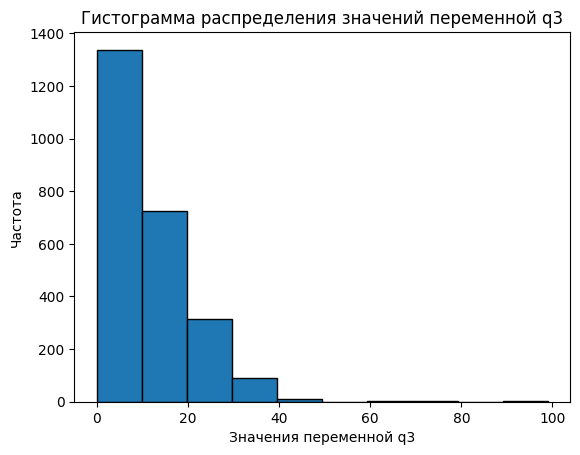

In [63]:
import matplotlib.pyplot as plt

# Построение гистограммы
plt.hist(df['q3'], bins=10, edgecolor='black')
# Настройка осей и заголовка
plt.xlabel('Значения переменной q3')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений переменной q3')

# Отображение гистограммы
plt.show()


Исходя из гистограммы распределения значений переменной q3, можно сделать следующие наблюдения:

Симметричность: Гистограмма может быть симметричной, если частота значений увеличивается и затем уменьшается с приближением к центральной оси. В данном случае симметричность отсутсвует

Пологость: Пологость распределения описывает, насколько значения переменной разбросаны или сконцентрированы вокруг центральной оси гистограммы. Если частота значений переменной снижается плавно от пика к концам гистограммы, это может указывать на умеренную пологость распределения. В данном случае, наша гистограмма не пологая

Отклонения: Значения переменной, отличные от основного распределения, могут указывать на выбросы или особые случаи. В данном случае, у нас присутствуют выбросы или редкие случаи в данных.

### Задание №3

3.1. Перекодируйте одну из интервальных переменных в порядковую. Постройте частотную таблицу по новой переменной и прокомментируйте полученные результаты.

In [65]:
df.head()

,region,cod_ychr,s1,s2,s4,q1,q2,q3,q4_1,q4_2,...,o10_1,q3_1,q4_1_1,q4_2_1,obrazov,qqq5_1,qqq5,w,level,profgroup
0,Город Москва,Министерство труда и социальной защиты Рос,Москва,Министерство труда и социальной защиты,,мужской,34.0,12.0,5.0,4.0,...,99.0,4.0,2.0,2.0,6.0,NaN,1.0,1.842105,федеральный,труд и социальное развитие
1,Город Москва,Министерство сельского хозяйства Российск,Москва,Министерство сельского хозяйства,Департамент правового обеспечения,мужской,30.0,6.0,4.0,1.0,...,3.0,3.0,2.0,1.0,6.0,NaN,1.0,1.842105,федеральный,сельское хозяйство
2,Город Москва,Министерство связи и массовых коммуникаций,Москва,Министерство связи имассовых коммуникаций,Департамент организационного развития,женский,32.0,4.0,4.0,4.0,...,3.0,2.0,2.0,2.0,7.0,NaN,1.0,1.842105,федеральный,"связь, информационные технологии и массовы"
3,Город Москва,Министерство образования и науки Российско,Москва,Министерство образования и науки,Департамент информационной политики,женский,34.0,10.0,2.0,1.0,...,99.0,3.0,2.0,1.0,8.0,NaN,1.0,1.842105,федеральный,образование и наука
4,Город Москва,Министерство труда и социальной защиты Рос,Москва,Министерство труда и социальной защиты,Департамент госполитики в сфере гос и муниципа...,мужской,43.0,15.0,5.0,5.0,...,3.0,4.0,2.0,2.0,8.0,NaN,1.0,1.842105,федеральный,труд и социальное развитие


In [69]:
# В качестве интервальной переменной возьмем - q2
# Создание словаря с промежутками и новыми значениями
mapping = { (0, 30): 'Молодой', (30, 40): 'Зрелый', (40, 100): 'Старый'}

# Перекодировка переменной
df['age_category'] = pd.cut(df['q2'], bins=[0, 30, 40, 100], labels=['Молодой', 'Зрелый', 'Старый'])

# Проверяю
df.head()



,region,cod_ychr,s1,s2,s4,q1,q2,q3,q4_1,q4_2,...,q3_1,q4_1_1,q4_2_1,obrazov,qqq5_1,qqq5,w,level,profgroup,age_category
0,Город Москва,Министерство труда и социальной защиты Рос,Москва,Министерство труда и социальной защиты,,мужской,34.0,12.0,5.0,4.0,...,4.0,2.0,2.0,6.0,NaN,1.0,1.842105,федеральный,труд и социальное развитие,Зрелый
1,Город Москва,Министерство сельского хозяйства Российск,Москва,Министерство сельского хозяйства,Департамент правового обеспечения,мужской,30.0,6.0,4.0,1.0,...,3.0,2.0,1.0,6.0,NaN,1.0,1.842105,федеральный,сельское хозяйство,Молодой
2,Город Москва,Министерство связи и массовых коммуникаций,Москва,Министерство связи имассовых коммуникаций,Департамент организационного развития,женский,32.0,4.0,4.0,4.0,...,2.0,2.0,2.0,7.0,NaN,1.0,1.842105,федеральный,"связь, информационные технологии и массовы",Зрелый
3,Город Москва,Министерство образования и науки Российско,Москва,Министерство образования и науки,Департамент информационной политики,женский,34.0,10.0,2.0,1.0,...,3.0,2.0,1.0,8.0,NaN,1.0,1.842105,федеральный,образование и наука,Зрелый
4,Город Москва,Министерство труда и социальной защиты Рос,Москва,Министерство труда и социальной защиты,Департамент госполитики в сфере гос и муниципа...,мужской,43.0,15.0,5.0,5.0,...,4.0,2.0,2.0,8.0,NaN,1.0,1.842105,федеральный,труд и социальное развитие,Старый


Построим частотную таблицу

In [70]:
df['age_category'].value_counts()

age_category
Старый     952
Зрелый     815
Молодой    710
Name: count, dtype: int64

Вывод: 
Эти значения представляют частоту каждого уровня в датасете. Например, "Старый" встречается 952 раза, "Зрелый" - 815 раз, а "Молодой" - 710 раз.
Из этой таблицы можно сделать вывод, что в датасете больше наблюдений со значением "Старый", затем идет "Зрелый", а "Молодой" имеет наименьшее количество наблюдений. Это может указывать на распределение возрастных категорий в вашем датасете и может быть полезно при проведении анализа или принятии решений, связанных с возрастом.

3.2. Создайте новую интервальную переменную по формуле, используя значения существующей(их) интервальной(ых) переменной(ых). Проведите описательный анализ новой переменной.

In [73]:
# Я создала новую интервальной переменной по формуле (я не нашла про какую формулу вы говорите и я написала свою (*0.5+10))
df['k'] = df['q2'].apply(lambda x: x * 0.5 + 10)
df.head()



,region,cod_ychr,s1,s2,s4,q1,q2,q3,q4_1,q4_2,...,q4_1_1,q4_2_1,obrazov,qqq5_1,qqq5,w,level,profgroup,age_category,k
0,Город Москва,Министерство труда и социальной защиты Рос,Москва,Министерство труда и социальной защиты,,мужской,34.0,12.0,5.0,4.0,...,2.0,2.0,6.0,NaN,1.0,1.842105,федеральный,труд и социальное развитие,Зрелый,27.0
1,Город Москва,Министерство сельского хозяйства Российск,Москва,Министерство сельского хозяйства,Департамент правового обеспечения,мужской,30.0,6.0,4.0,1.0,...,2.0,1.0,6.0,NaN,1.0,1.842105,федеральный,сельское хозяйство,Молодой,25.0
2,Город Москва,Министерство связи и массовых коммуникаций,Москва,Министерство связи имассовых коммуникаций,Департамент организационного развития,женский,32.0,4.0,4.0,4.0,...,2.0,2.0,7.0,NaN,1.0,1.842105,федеральный,"связь, информационные технологии и массовы",Зрелый,26.0
3,Город Москва,Министерство образования и науки Российско,Москва,Министерство образования и науки,Департамент информационной политики,женский,34.0,10.0,2.0,1.0,...,2.0,1.0,8.0,NaN,1.0,1.842105,федеральный,образование и наука,Зрелый,27.0
4,Город Москва,Министерство труда и социальной защиты Рос,Москва,Министерство труда и социальной защиты,Департамент госполитики в сфере гос и муниципа...,мужской,43.0,15.0,5.0,5.0,...,2.0,2.0,8.0,NaN,1.0,1.842105,федеральный,труд и социальное развитие,Старый,31.5


In [74]:
# Описательный анализ новой переменной
print(df['k'].describe())

count    2477.000000
mean       29.249697
std         5.236600
min        19.500000
25%        25.000000
50%        28.500000
75%        33.000000
max        58.500000
Name: k, dtype: float64


Исходя из результатов описательного анализа переменной "k", я сделала следующие выводы:

1) Средний возраст, вычисленный с помощью формулы возраст * 0.5 + 10, составляет примерно 29.25. Это может указывать на то, что в выборке преобладают люди с возрастом около 29 лет.

2) Стандартное отклонение равно примерно 5.24, что означает, что возраста в выборке отклоняются от среднего значения на сравнительно небольшую величину. Это может свидетельствовать о некоторой степени схожести возрастов в выборке.

3) Минимальный возраст в выборке составляет 19.5 лет, а максимальный возраст - 58.5 лет. Это указывает на наличие разнообразия возрастов в выборке, которые охватывают диапазон от молодых до более старших возрастных групп.

4) Квартили (25%, 50%, 75%) представляют собой точки, разделяющие выборку на четыре равные части. Например, 25% квартиль равен 25.0, что означает, что 25% значений переменной "k" в выборке меньше или равны 25.0. Эти значения могут помочь понять распределение возрастов в выборке и выделить особенности различных возрастных групп.



3.3. Отберите небольшую подгруппу госслужащих по нескольким критериям с помощью фильтрации и охарактеризуйте её (возраст, пол, уровень образования, заработок).

In [76]:
df.head()

,region,cod_ychr,s1,s2,s4,q1,q2,q3,q4_1,q4_2,...,q4_1_1,q4_2_1,obrazov,qqq5_1,qqq5,w,level,profgroup,age_category,k
0,Город Москва,Министерство труда и социальной защиты Рос,Москва,Министерство труда и социальной защиты,,мужской,34.0,12.0,5.0,4.0,...,2.0,2.0,6.0,NaN,1.0,1.842105,федеральный,труд и социальное развитие,Зрелый,27.0
1,Город Москва,Министерство сельского хозяйства Российск,Москва,Министерство сельского хозяйства,Департамент правового обеспечения,мужской,30.0,6.0,4.0,1.0,...,2.0,1.0,6.0,NaN,1.0,1.842105,федеральный,сельское хозяйство,Молодой,25.0
2,Город Москва,Министерство связи и массовых коммуникаций,Москва,Министерство связи имассовых коммуникаций,Департамент организационного развития,женский,32.0,4.0,4.0,4.0,...,2.0,2.0,7.0,NaN,1.0,1.842105,федеральный,"связь, информационные технологии и массовы",Зрелый,26.0
3,Город Москва,Министерство образования и науки Российско,Москва,Министерство образования и науки,Департамент информационной политики,женский,34.0,10.0,2.0,1.0,...,2.0,1.0,8.0,NaN,1.0,1.842105,федеральный,образование и наука,Зрелый,27.0
4,Город Москва,Министерство труда и социальной защиты Рос,Москва,Министерство труда и социальной защиты,Департамент госполитики в сфере гос и муниципа...,мужской,43.0,15.0,5.0,5.0,...,2.0,2.0,8.0,NaN,1.0,1.842105,федеральный,труд и социальное развитие,Старый,31.5


In [79]:
df.columns.tolist()

['region',
 'cod_ychr',
 's1',
 's2',
 's4',
 'q1',
 'q2',
 'q3',
 'q4_1',
 'q4_2',
 'q5',
 'qq5',
 'q6',
 'q7',
 'q7_dr',
 'q8',
 'q8_dr',
 'q9',
 'q9_dr',
 'q10',
 'q10_dr',
 'q11',
 'm1',
 'm2_1',
 'm2_2',
 'm2_3',
 'm2_4',
 'm2_5',
 'm2_6',
 'm2_7',
 'm2_8',
 'm2_9',
 'm3_1',
 'm3_2',
 'm3_3',
 'm3_4',
 'm3_5',
 'm3_6',
 'm3_7',
 'm3_8',
 'm3_9',
 'm3_10',
 'm4_1',
 'm4_2',
 'm4_3',
 'm4_4',
 'm4_5',
 'm4_dr',
 'm5_1',
 'm5_2',
 'm5_3',
 'm5_4',
 'm6_1',
 'm6_2',
 'm6_3',
 'm7',
 'm8',
 'm9',
 'm10',
 'm11',
 'm12',
 'm12_dr',
 'm13_1',
 'm13_2',
 'm13_3',
 'm13_4',
 'm13_5',
 'm14_1',
 'm14_2',
 'm14_3',
 'm14_4',
 'm14_5',
 'm14_6',
 'm14_7',
 'm14_8',
 'm14_9',
 'm14_10',
 'm15',
 'm16',
 'm171',
 'm171_dr',
 'm172_1',
 'm172_2',
 'm172_dr',
 'm18',
 'm19_1',
 'm19_2',
 'm20',
 'm21',
 'm22',
 'm23_1',
 'm23_2',
 'm23_3',
 'm23_4',
 'm23_5',
 'm23_6',
 'm23_dr',
 'm24_1',
 'm24_2',
 'm24_3',
 'm24_dr',
 'm25',
 'm25_dr',
 'o1',
 'o2_1',
 'o2_2',
 'o2_3',
 'o2_4',
 'o2_5',
 'o3',

Возраст - q2
Пол - q1
Уровень образования - q6
Заработок - m2_2